In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Import monthly demand data
#manual process to combine EIA datasets before this step as they would only allow export of 10 months max at a time
#csv files had odd date format that I could not get python to recognize so reformatted in excel
#could not get hours in a month to work via .days_in_month command so added hours per month directly based on webpage data
demand_data = pd.read_csv('CISO demand data 2016 2017 w hours.csv')
demand_data.head(2)

,Month,CISO demand megawatthours,CAL demand megawatthours,Hours in Month
0,12/1/2017 0:00,18379575,22420992,744
1,11/1/2017 0:00,17352790,21123360,720


In [3]:
# Change scale of megawatthours to megawatts for comparison to production
# demand_data['CISO Mw']=(demand_data['CISO demand megawatthours'] / demand_data['Hours in Month'])
# demand_data.head(2)

In [4]:
# Convert dates into sortable format and sort
#can lose months
demand_data=demand_data.rename(columns={'Month':'Date'})

import datetime
pd.plotting.register_matplotlib_converters()
demand_data['Date'] = pd.to_datetime(demand_data['Date'])
demand_data.sort_values(by=['Date']).head()

,Date,CISO demand megawatthours,CAL demand megawatthours,Hours in Month
23,2016-01-01,17934580,21946816,744
22,2016-02-01,16408995,20118078,696
21,2016-03-01,17893864,21827515,744
20,2016-04-01,17468662,21318886,720
19,2016-05-01,18616178,22757042,744


In [54]:
demand_data['MONTH'] = demand_data['Date'].dt.month
demand_data['Year'] = demand_data['Date'].dt.year
demand_data.head()

,Date,CISO demand megawatthours,CAL demand megawatthours,Hours in Month,Month,Year,MONTH
0,2017-12-01,18379575,22420992,744,12,2017,12
1,2017-11-01,17352790,21123360,720,11,2017,11
2,2017-10-01,19103643,23413973,744,10,2017,10
3,2017-09-01,20861520,25758002,720,9,2017,9
4,2017-08-01,23558109,29200284,744,8,2017,8


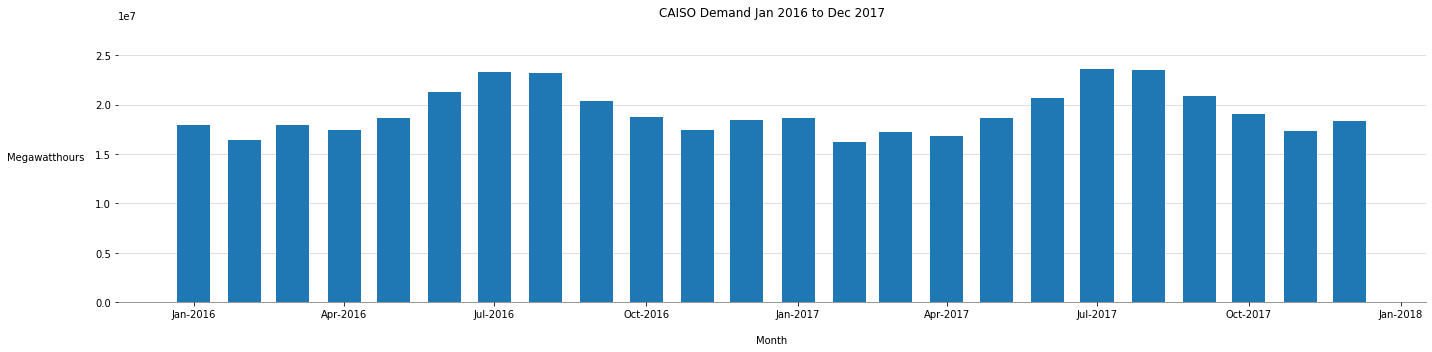

In [6]:
# Plot bar chart for total demand only
fig,ax = plt.subplots()
fig.set_figheight(5) #adjust if needed
fig.set_figwidth(20) #adjust if needed
y_axis = demand_data['CISO demand megawatthours'] 
x_axis = demand_data['Date'] 
plt.bar(x_axis,y_axis,width=20,align='center') #not sure why widths default were so narrow
plt.ylim(0,max(y_axis)*1.2) #adjust if needed
#plt.xlim(min(x_axis),max(x_axis)) ****set so don't see month that is not in set in axis
plt.title("CAISO Demand Jan 2016 to Dec 2017")
plt.xlabel ("\nMonth")
plt.ylabel ("Megawatthours  ",rotation='0',ha='right')
plt.tight_layout()

# Adjust for better data viz
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.5)
ax.set_axisbelow(True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) #change label frequnecy?

#plt.savefid(path/name.format)     #if needed
#plt.legend                        #probably won't need but not sure what it will look like yet

,MONTH,CISO demand megawatthours,Demand Gigawatthours
0,Jan,17934580,17934.580
1,Feb,16408995,16408.995


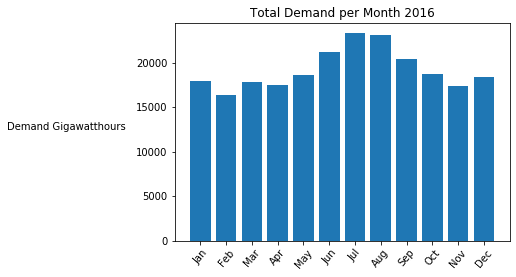

In [58]:
# Prepare data for combined table by conforming demand data
all_source_yr_mon_group=demand_data.groupby(['Year','MONTH'])
monthly_sum_demand = pd.DataFrame(all_source_yr_mon_group['CISO demand megawatthours'].sum())
# Have to adjust scale so shows without scientific notation
monthly_sum_demand['Demand Gigawatthours'] = (monthly_sum_demand['CISO demand megawatthours'] / 1000)
monthly_sum_demand
data_16_demand = monthly_sum_demand.loc[2016].reset_index()
data_16_demand['MONTH'] = data_16_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
display(data_16_demand.head(2))

plt.bar(data_16_demand['MONTH'],data_16_demand['Demand Gigawatthours'])
plt.xticks(rotation=50)
plt.title('Total Demand per Month 2016')
plt.ylabel("Demand Gigawatthours  ",rotation='0',ha='right')
plt.show()

,MONTH,RENEW TOTAL,Solar Total,Wind Total,Wind Solar Total
0,Jan,3413971.0,829948.0,724652.0,1554600.0
1,Feb,3661808.0,1366327.0,559124.0,1925451.0


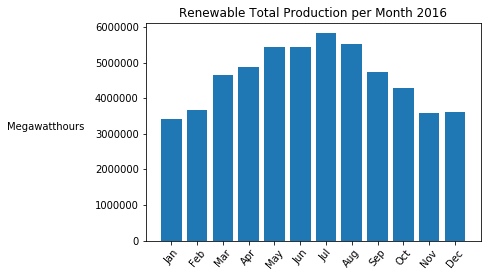

In [26]:
#wont need this cell when merge
full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
# display(full_data.head(2))
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data['WIND SOLAR'] = full_data['SOLAR TOTAL'] + full_data['WIND TOTAL']
full_data['RENEW TOTAL'] = full_data['BIOGAS'] + full_data['BIOMASS']+ full_data['GEOTHERMAL']+full_data['GEOTHERMAL']+full_data['WIND SOLAR']

YearMonthGrouped = full_data.groupby(['YEAR','MONTH'])
monthly_sum = pd.DataFrame(YearMonthGrouped['RENEW TOTAL'].sum())

monthly_sum['Solar Total'] = YearMonthGrouped['SOLAR TOTAL'].sum()
monthly_sum['Wind Total'] = YearMonthGrouped['WIND TOTAL'].sum()
monthly_sum['Wind Solar Total'] = YearMonthGrouped['WIND SOLAR'].sum()

data_16 = monthly_sum.loc[2016].reset_index()
data_16['MONTH'] = data_16['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
display(data_16.head(2))

# plt.bar(data_16['MONTH'],data_16['Wind Solar Total'])
# plt.xticks(rotation=50)
# plt.title('Wind and Solar Combined Production per Month 2016')
# plt.ylabel("Megawatthours  ",rotation='0',ha='right')
# plt.show()

plt.bar(data_16['MONTH'],data_16['RENEW TOTAL'])
plt.xticks(rotation=50)
plt.title('Renewable Total Production per Month 2016')
plt.ylabel("Megawatthours  ",rotation='0',ha='right')
plt.show()

In [64]:
# Merge 2016 datasets
merged_df = pd.merge(data_16, data_16_demand, on="MONTH")

#Show renewables at Gigawatt scale
merged_df['Renew Gigawatthours'] = merged_df['RENEW TOTAL'] / 1000

# Get percent renewables
merged_df['Percent Renew'] = merged_df['Renew Gigawatthours'] / merged_df['Demand Gigawatthours'] *100
merged_df.head()

,MONTH,RENEW TOTAL,Solar Total,Wind Total,Wind Solar Total,CISO demand megawatthours,Demand Gigawatthours,Renew Gigawatthours,Percent Renew
0,Jan,3413971.0,829948.0,724652.0,1554600.0,17934580,17934.580,3413.971,19.035690
1,Feb,3661808.0,1366327.0,559124.0,1925451.0,16408995,16408.995,3661.808,22.315858
2,Mar,4648914.0,1491268.0,1346410.0,2837678.0,17893864,17893.864,4648.914,25.980493
3,Apr,4879733.0,1762602.0,1387542.0,3150144.0,17468662,17468.662,4879.733,27.934212
4,May,5449757.0,2127094.0,1617675.0,3744769.0,18616178,18616.178,5449.757,29.274306


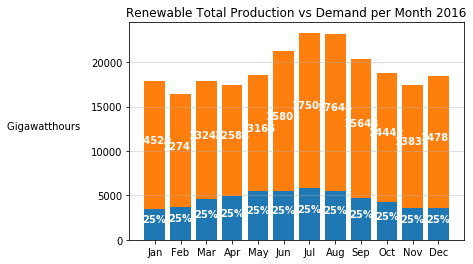

In [88]:
# Plot combined chart
fig,ax = plt.subplots()
renew_16 = merged_df['Renew Gigawatthours']
p1 = plt.bar(merged_df['MONTH'],renew_16) #make dark green?

# Show total demand less renewables produced
p2 = plt.bar(merged_df['MONTH'],(data_16_demand['Demand Gigawatthours']-renew_16),bottom=renew_16) #make light green? 
    #consistent with other charts for total demand

# Label bars
#needs fixing
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '25%', ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white",fontweight="bold")

# count=0
# for bar in p1:
#     height = bar.get_height()
#     ax.text(bar. get_x() + bar.get_width()/2., .7*height,
#             (merged_df['Percent Renew']+'\n'+str(int(height*100))+'%'),color="w",weight='bold',
#             ha='center', va='bottom')
#     count +=1

plt.title('Renewable Total Production vs Demand per Month 2016')
plt.ylabel("Gigawatthours  ",rotation='0',ha='right')
plt.grid(axis='y',alpha=.5) #move behind bars
plt.show()

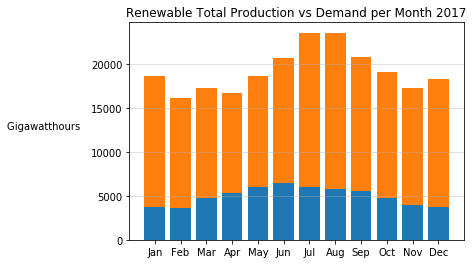

In [77]:
# Repeat for 2017 - unmerged example - still need percent renewables

data_17 = monthly_sum.loc[2017].reset_index()
data_17['MONTH'] = data_17['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

data_17_demand = monthly_sum_demand.loc[2017].reset_index()
data_17_demand['MONTH'] = data_17_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

renew_17 = (data_17['RENEW TOTAL'] / 1000)
p1 = plt.bar(data_17['MONTH'],renew_17)
# Show total demand less renewables produced
p2 = plt.bar(data_17_demand['MONTH'],(data_17_demand['Demand Gigawatthours']-renew_17),bottom=renew_17)

plt.title('Renewable Total Production vs Demand per Month 2017')
plt.ylabel("Gigawatthours  ",rotation='0',ha='right')
plt.grid(axis='y',alpha=.5) #move behind bars
plt.show()